In [1]:
# 파이썬 라이브러리를 이용한 데이터 분석 
# https://play.dobest.io / ID : tacademy / Pass : dkstncks

# 크레딧잡 
# https://kreditjob.com/

# 함수 
# "삼성" => 모든 삼성 계열사 ( 삼성SDS, 삼성전자 )

In [2]:
# 2. 동적인 사이트! 서버로부터 데이터를 받아온다!
# 크롬 개발자 도구 > Network > All

# 실제 매물정보(리소스)를 가지고 있는 API 를 찾자.

In [16]:
# ALL => Image, CSS, JS, XHR,...

# AJAX ( Async Javascript and XML ) - XML HTTP Request ( XHR )
# 서버로 부터 데이터를 받아오는(Fetch)

In [17]:
url = "https://api.zigbang.com/v1/items?detail=true&item_ids=6423394&item_ids=6395815&item_ids=5995433&item_ids=6424758&item_ids=6211301&item_ids=6285114&item_ids=6426548&item_ids=6410702&item_ids=6305853&item_ids=6256852&item_ids=6396121&item_ids=6424508&item_ids=6393377&item_ids=6415633&item_ids=6338386&item_ids=6422447&item_ids=6167680&item_ids=6424804&item_ids=6400219&item_ids=6235949&item_ids=6312690&item_ids=6394232&item_ids=6188763&item_ids=6289652&item_ids=6389364&item_ids=6425232&item_ids=6323511&item_ids=6322440&item_ids=6254050&item_ids=6339438&item_ids=6398176&item_ids=6254961&item_ids=6124173&item_ids=6387858&item_ids=6322281&item_ids=6421010&item_ids=6238499&item_ids=6367887&item_ids=6354071&item_ids=6417467&item_ids=6427351&item_ids=6425246&item_ids=6424318&item_ids=6335211&item_ids=6113664&item_ids=6275936&item_ids=6413574&item_ids=6384007&item_ids=6222912&item_ids=6422507&item_ids=6293543&item_ids=6405725&item_ids=6413261&item_ids=6424746&item_ids=6350223&item_ids=6401349&item_ids=6390306&item_ids=6276404&item_ids=6323525&item_ids=6394144"

In [18]:
import requests

In [19]:
response = requests.get(url)

In [20]:
# response.text  # JSON Format 으로 만들어진 Str
# ========================================> Dict
# 플러그인명: JSONView
# --------------
# 1. [  {"deposit": ___, "rent": ______}, {...} ]
# 2. 연산: 매물의 보증금 합! ( 월세의 합 )

In [21]:
import json

In [22]:
# data = json.loads(response.text)
data = response.json()

In [23]:
data.get("items")[1].get("item").get("rent")
#                 2,3,4

0

In [24]:
data = response.json()
data = [
    item.get("item")
    for item
    in data.get("items")
]
data = [
    {
        "deposit": item.get("deposit"),
        "rent": item.get("rent"),
    }
    for item
    in data
]

In [25]:
len(data)

49

In [26]:
from functools import reduce

In [27]:
deposit_rent_sum = reduce(
    lambda a, b: {
        "deposit": a["deposit"] + b["deposit"],
        "rent": a["rent"] + b["rent"],
    },
    data,
)

In [28]:
deposit_rent_sum["deposit"] / len(data)

5867.34693877551

In [29]:
deposit_rent_sum["rent"] / len(data)

26.244897959183675

In [30]:
# .sum()
# .mean()

In [31]:
# 서비스 개발자 입장에서,

# 0. 로그인 ( 쿠키, 세션 ) / Authorization
# 1. Host, Referer
# 2. Custom Header

# 요기요 -> 모바일(API), 웹 
#         Basic Auth, JWT, Token-based Auth

# ---
# API Client ( Postman . getpostman.com )

In [32]:
import requests
url = "https://www.yogiyo.co.kr/api/v1/restaurants-geo/?items=20&order=rank&page=0&search=&zip_code=151057"

In [33]:
headers = {
    "X-ApiKey": "iphoneap",
    "X-ApiSecret": "fe5183cc3dea12bd0ce299cf110a75a2"
}
# Network 탭에서 직접 찾아보세요!

In [34]:
response = requests.get(url, headers=headers)

In [35]:
response.json()

{'pagination': {'current_page': 0,
  'per_page': 20,
  'total_objects': 304,
  'total_pages': 16},
 'restaurants': [{'additional_discount': 2000,
   'additional_discount_currently_active': True,
   'additional_discount_per_menu': 0,
   'address': '서울 관악구 봉천동 1643-5 1층',
   'adv_distance': None,
   'advertisement_rank': 1,
   'advertisement_type': 'contract',
   'app_order': True,
   'can_review': 0,
   'categories': ['프랜차이즈', '치킨', '야식'],
   'central_billing': False,
   'city': '서울',
   'delivery_fee': 0,
   'delivery_fee_explanation': '최소 주문 금액 15000원 이상',
   'description': '',
   'dine_in': False,
   'discount_from': None,
   'discount_percent': 0,
   'discount_until': None,
   'distance': 1.0167376472982876,
   'except_cash': False,
   'franchise_id': 37,
   'franchise_name': '(유)비에이치씨 / BHC치킨',
   'free_delivery_threshold': 0,
   'has_loyalty_support': True,
   'has_terminal': True,
   'id': 218087,
   'is_hotdeal': True,
   'keywords': 'BHC-낙성대점 <후라이드> 쏘스에무쵸 <후라이드> 쏘스에무쵸HOT <양념／순살

In [36]:
# 1. 정적인 사이트
# 2. 동적인 사이트 
# 3, 4. selenium - integration test ( 브라우저에서 테스트 )

# -----
# numpy.ndarray,
# pandas.Series, pandas.DataFrame
#

# 1. Data Types, 조건문, 반복문, 함수, + Lambda Operator, List Comprehension
# 2. Data 수집하기 => 1. 정적인 사이트, 2. 동적인 사이트 

# 3. Numpy ( 다차원 벡터; 행렬 ) - 이미지 , 영상 
# 4. Pandas ( 엑셀, 시계열 데이터 ) - 주가. 엑셀++

# 5. Matplotlib
# 데이터 분석 프로세스


In [1]:
from selenium import webdriver

In [4]:
driver = webdriver.PhantomJS()

In [5]:
driver.get("http://naver.com")

In [6]:
from IPython.display import Image

In [7]:
driver.get("https://nid.naver.com/nidlogin.login")

In [8]:
driver.find_element_by_css_selector("#id").send_keys("saltman21")

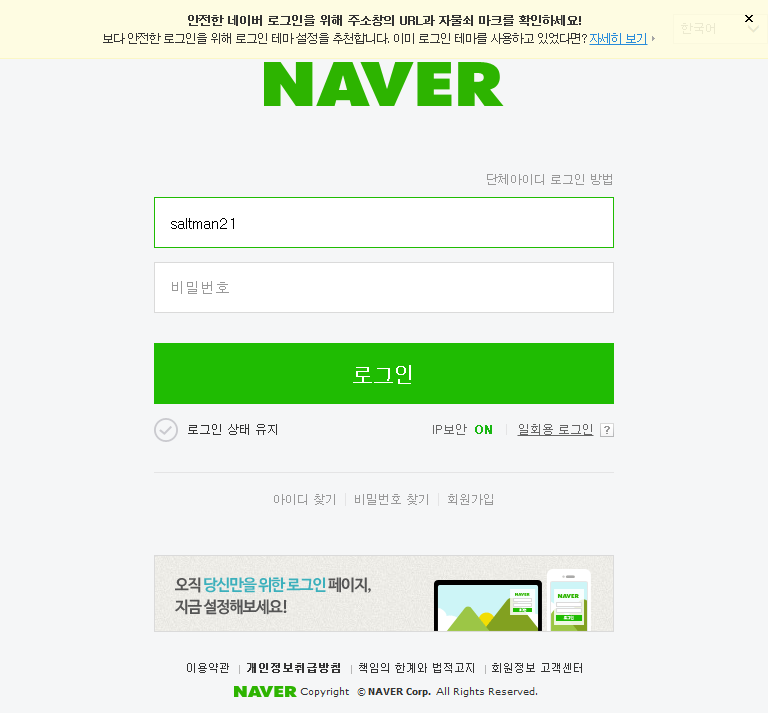

In [9]:
Image(driver.get_screenshot_as_png())

In [37]:
data = data[:5]

In [74]:
data

[{'deposit': 2000, 'rent': 60},
 {'deposit': 300, 'rent': 29},
 {'deposit': 23000, 'rent': 0},
 {'deposit': 500, 'rent': 55},
 {'deposit': 1000, 'rent': 44}]

In [75]:
# 2000 300 23000 500 1000
#     2300 25300 500 1000

# $ requests, beautifulsoup4
# $ numpy, pandas

In [77]:
def temp_func(x, y):
    sum_deposit = x["deposit"] + y["deposit"]
    sum_rent = x["rent"] + y["rent"]
    return {
        "deposit": sum_deposit,
        "rent": sum_rent,
    }

# map, filter, ... , reduce(o o => x)
reduce(
    temp_func,
    data,
)                 # 히스토그램 => {...} 

{'deposit': 26800, 'rent': 188}

In [ ]:
deposit_rent_sum = reduce(
    lambda a, b: {
        "deposit": a["deposit"] + b["deposit"],
        "rent": a["rent"] + b["rent"],
    },
    data,
)